In [1]:
import data_analysis_func as func
import numpy as np
from unbalanced_cv import get_fold
from sklearn.neighbors import KNeighborsClassifier
import networkx as nx

In [2]:
array_radius = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
#array_radius = [350]
root = 'prostate_marked/S07_46186 10X_20151028_59'
#root = 'prostate_marked/3'

k = 3                                       # Number of neighbors for the k-nearest neighbors classifier
n_classes = 2                               # Number of classes in the dataset
num_folds = 5                               # Number of Folds
num_real = 10

print_classes = False                       # Option to visualize fold data class
print_all_accuracy = True                   # Option to visualize fold by fold accuracy

#Properties to be validated
# Shapes  - 1
# Network - 2
# All     - 3
# All idx - 4
# Degree  - 5

props_type = 5
properties_names = None

# Shapes props
if props_type == 1:
    properties_names = ['area', 'diameter', 'perimeter', 'eccentricity', 'solidity']

# Network props
elif props_type == 2:
    properties_names = ['degree', 'betweenness', 'strength']

# Shapes and Network props
elif props_type == 3:
    properties_names = ['area', 'diameter', 'perimeter', 'eccentricity', 'solidity', 'degree', 'betweenness', 'strength']

# All Props with IDX
elif props_type == 4:
    properties_names = ['idx', 'area', 'diameter', 'perimeter', 'eccentricity', 'solidity', 'degree', 'betweenness', 'strength']    

elif props_type == 5:
    properties_names = ['degree']    

In [3]:
all_radius_acc = []#np.zeros( (len(array_radius), num_real) )

for radius in array_radius:
    path_gml = root + '/results_radius_' + str(radius) + '/' + 'grafo_glands_properties_' + str(radius) + 'r.gml'
    G_read = nx.read_gml(path_gml)
    nodes, nodes_demarcated = func.display_gland_numbers(G_read, print_number_of_glands=False)

    N1 = len(nodes)
    N2 = len(nodes_demarcated)

    N = N1 + N2
    
    all_radius_acc.append( [] )
    
    for real in range(num_real):
        pred_classes = np.full(N, -1)      # Will store the classes predicted by the classifier

        table_properties_norm, classes = func.get_table_properties(G_read, properties_names, True)
        table_properties = func.remove_idx_from_table_properties(properties_names, table_properties_norm)
        data = table_properties

        list_test_index = []
        for data_train, classes_train, data_test, classes_test, test_indices in get_fold(data, classes, num_folds):
            list_test_index.extend(test_indices)
            # Train classifier using data_train, classes_train
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(data_train, classes_train)

            # Test classifier using data_test, classes_test
            pred = knn.predict(data_test)

            # Save predictions
            pred_classes[test_indices] = pred

        radius_acc = {}
        radius_acc = {
            "Radius": radius,
            "Normal Glands": N1,
            "Demarcated Glands": N2,
            "Total Glands": N,
            "Typed Classes": classes,
            "Predicted Classes": pred_classes,
            "Accuracy": (np.sum(classes==pred_classes)/N),
            "Test Indexes": list_test_index
            }
        all_radius_acc[-1].append(radius_acc)

        print("Radius: %d - Realization: %d - Accuracy: %3.2f" % (radius, real, (np.sum(classes==pred_classes)/N)) )

Radius: 25 - Realization: 0 - Accuracy: 0.33
Radius: 25 - Realization: 1 - Accuracy: 0.33
Radius: 25 - Realization: 2 - Accuracy: 0.33
Radius: 25 - Realization: 3 - Accuracy: 0.33
Radius: 25 - Realization: 4 - Accuracy: 0.33
Radius: 25 - Realization: 5 - Accuracy: 0.33
Radius: 25 - Realization: 6 - Accuracy: 0.33
Radius: 25 - Realization: 7 - Accuracy: 0.33
Radius: 25 - Realization: 8 - Accuracy: 0.33
Radius: 25 - Realization: 9 - Accuracy: 0.33
Radius: 50 - Realization: 0 - Accuracy: 0.75
Radius: 50 - Realization: 1 - Accuracy: 0.76
Radius: 50 - Realization: 2 - Accuracy: 0.76
Radius: 50 - Realization: 3 - Accuracy: 0.76
Radius: 50 - Realization: 4 - Accuracy: 0.75
Radius: 50 - Realization: 5 - Accuracy: 0.76
Radius: 50 - Realization: 6 - Accuracy: 0.76
Radius: 50 - Realization: 7 - Accuracy: 0.75
Radius: 50 - Realization: 8 - Accuracy: 0.76
Radius: 50 - Realization: 9 - Accuracy: 0.75
Radius: 75 - Realization: 0 - Accuracy: 0.77
Radius: 75 - Realization: 1 - Accuracy: 0.76
Radius: 75

Radius: 475 - Realization: 0 - Accuracy: 0.92
Radius: 475 - Realization: 1 - Accuracy: 0.93
Radius: 475 - Realization: 2 - Accuracy: 0.93
Radius: 475 - Realization: 3 - Accuracy: 0.93
Radius: 475 - Realization: 4 - Accuracy: 0.93
Radius: 475 - Realization: 5 - Accuracy: 0.93
Radius: 475 - Realization: 6 - Accuracy: 0.93
Radius: 475 - Realization: 7 - Accuracy: 0.94
Radius: 475 - Realization: 8 - Accuracy: 0.93
Radius: 475 - Realization: 9 - Accuracy: 0.93
Radius: 500 - Realization: 0 - Accuracy: 0.93
Radius: 500 - Realization: 1 - Accuracy: 0.92
Radius: 500 - Realization: 2 - Accuracy: 0.93
Radius: 500 - Realization: 3 - Accuracy: 0.93
Radius: 500 - Realization: 4 - Accuracy: 0.92
Radius: 500 - Realization: 5 - Accuracy: 0.93
Radius: 500 - Realization: 6 - Accuracy: 0.93
Radius: 500 - Realization: 7 - Accuracy: 0.92
Radius: 500 - Realization: 8 - Accuracy: 0.92
Radius: 500 - Realization: 9 - Accuracy: 0.92
Radius: 525 - Realization: 0 - Accuracy: 0.92
Radius: 525 - Realization: 1 - Acc

Radius: 925 - Realization: 0 - Accuracy: 0.89
Radius: 925 - Realization: 1 - Accuracy: 0.88
Radius: 925 - Realization: 2 - Accuracy: 0.89
Radius: 925 - Realization: 3 - Accuracy: 0.89
Radius: 925 - Realization: 4 - Accuracy: 0.89
Radius: 925 - Realization: 5 - Accuracy: 0.88
Radius: 925 - Realization: 6 - Accuracy: 0.88
Radius: 925 - Realization: 7 - Accuracy: 0.89
Radius: 925 - Realization: 8 - Accuracy: 0.89
Radius: 925 - Realization: 9 - Accuracy: 0.89
Radius: 950 - Realization: 0 - Accuracy: 0.90
Radius: 950 - Realization: 1 - Accuracy: 0.89
Radius: 950 - Realization: 2 - Accuracy: 0.89
Radius: 950 - Realization: 3 - Accuracy: 0.89
Radius: 950 - Realization: 4 - Accuracy: 0.89
Radius: 950 - Realization: 5 - Accuracy: 0.89
Radius: 950 - Realization: 6 - Accuracy: 0.89
Radius: 950 - Realization: 7 - Accuracy: 0.89
Radius: 950 - Realization: 8 - Accuracy: 0.89
Radius: 950 - Realization: 9 - Accuracy: 0.89
Radius: 975 - Realization: 0 - Accuracy: 0.88
Radius: 975 - Realization: 1 - Acc

In [4]:
y_radius_acc = []
x = []
y = []
std_dev_error = []

for radius_acc in all_radius_acc:
    print("------")
    print(radius_acc[0]["Radius"])
    print("------")
    
    N = 0
    y_array = []
    for acc in radius_acc:
        print(acc["Accuracy"])
        y_array.append(acc["Accuracy"])
        N += 1
        
    std_dev = np.std(y_array)
    y_acc = {
             "Radius": radius_acc[0]["Radius"],
             "Times": N,
             "Accuracy": y_array,
             "Std Dev" : std_dev
            }
    
    x.append(radius_acc[0]["Radius"])
    y.append(np.sum(y_array)/N)
    std_dev_error.append(std_dev)
    
    y_radius_acc.append(y_acc)


------
25
------
0.3341260404280618
0.3341260404280618
0.3341260404280618
0.32996432818073723
0.3341260404280618
0.3332342449464923
0.3341260404280618
0.3332342449464923
0.3329369797859691
0.3341260404280618
------
50
------
0.75
0.7621878715814506
0.7589179548156956
0.7598097502972652
0.7470273483947681
0.7586206896551724
0.7621878715814506
0.7538644470868014
0.7607015457788348
0.7538644470868014
------
75
------
0.7728894173602854
0.7571343638525565
0.7687277051129607
0.7904280618311534
0.7395957193816884
0.8097502972651606
0.7589179548156956
0.7844827586206896
0.8198573127229488
0.7824019024970273
------
100
------
0.8305588585017836
0.7835909631391201
0.8055885850178359
0.8332342449464922
0.7734839476813318
0.8136147443519619
0.8225326991676576
0.8234244946492271
0.7773483947681332
0.8070749108204518
------
125
------
0.8370986920332937
0.7963733650416172
0.8100475624256838
0.786563614744352
0.824910820451843
0.8415576694411415
0.8409631391200951
0.8195600475624257
0.83917954815695

In [5]:
print(np.max(std_dev_error))
std_dev_error

0.023153196955327023


[0.0012342770209290462,
 0.004990514571089957,
 0.023153196955327023,
 0.020857954796322502,
 0.019460971788664388,
 0.010500826051919319,
 0.01081309938229758,
 0.009169509969216833,
 0.005068872215706023,
 0.006582191761166707,
 0.007291727155440775,
 0.007986646916888654,
 0.005027561566210505,
 0.004736134665078365,
 0.00515127159109326,
 0.002439748457631784,
 0.004467787570603074,
 0.003418032324031545,
 0.003045481206864616,
 0.003140898678209814,
 0.0035218081378406195,
 0.003361725949756979,
 0.003825491941593615,
 0.0032828627092219976,
 0.002854983877180262,
 0.0027408105729749216,
 0.004242568537615359,
 0.0028113175784867978,
 0.0032645074704618993,
 0.003289316573988838,
 0.002898754504885281,
 0.002770951417685548,
 0.002504977153125133,
 0.0026925069855467986,
 0.002495080210195399,
 0.0018585611215625026,
 0.0038575810219995954,
 0.002866875512159202,
 0.002883472057074898,
 0.0022763602519710623]

In [6]:
x[23]

600

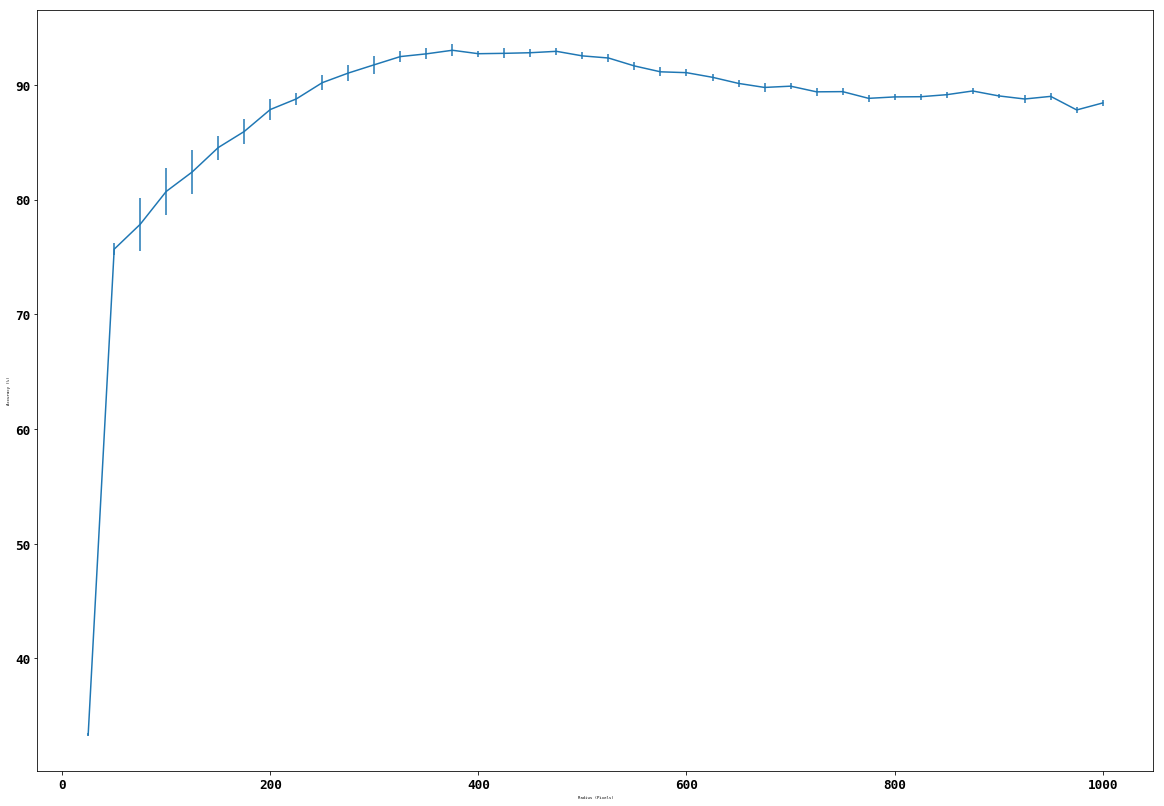

In [59]:

plt.figure(figsize=(20,14))
plt.errorbar(x, np.array(y)*100, np.array(std_dev_error)*100 )

plt.xlabel('Radius (Pixels)', fontsize=4)
plt.ylabel('Accuracy (%)', fontsize=4)

plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25) 

size=17
params = {'legend.fontsize': 'large',
          'figure.figsize': (14,7),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 0}
plt.rcParams.update(params)

plt.savefig(root + '/radius_accuracy.png', dpi=300)
plt.show()


In [10]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [16]:
labels = []
true_positive = []
false_positive = []
true_negative = [] 
false_negative = []

print_matrix = False

for radius_acc in all_radius_acc:
    position, class_colors, confusion_matrix = func.get_colors_by_pred_results_test_indices(G_read, radius_acc["Predicted Classes"], radius_acc["Test Indexes"])
    
    if(radius_acc["Accuracy"] > .93):
        labels.append(radius_acc["Radius"])
        true_negative.append(confusion_matrix[0][0]) 
        false_positive.append(confusion_matrix[0][1])
        false_negative.append(confusion_matrix[1][0])
        true_positive.append(confusion_matrix[1][1])
    
    if print_matrix:
        print('--------------------------------------')
        print('-- Radius ' + str(radius_acc["Radius"]) )
        print('-- Accuracy ' + str(radius_acc["Accuracy"]))
        print('--------------------------------------')
        print('         +--------------------------------+')
        print('         |Classe Saudável | Classe Doente |')
        print('         +--------------------------------+')
        print('Saudável |      ' + str(confusion_matrix[0][0]) + '      |      ' + str(confusion_matrix[0][1]) + '      |')
        print('         +--------------------------------+')
        print('Doente   |      ' + str(confusion_matrix[1][0]) + '       |      ' + str(confusion_matrix[1][1]) + '      |')
        print('         +--------------------------------+')
        print('')
        print('')
        #print('Total Saudável:  ' + str(confusion_matrix[0][0] + confusion_matrix[1][0]))
        #print('Total Doente:    ' + str(confusion_matrix[0][1] + confusion_matrix[1][1]))
        #print('Total Glândulas: ' + str(np.sum(confusion_matrix)))

TypeError: list indices must be integers or slices, not str

IndexError: list index out of range

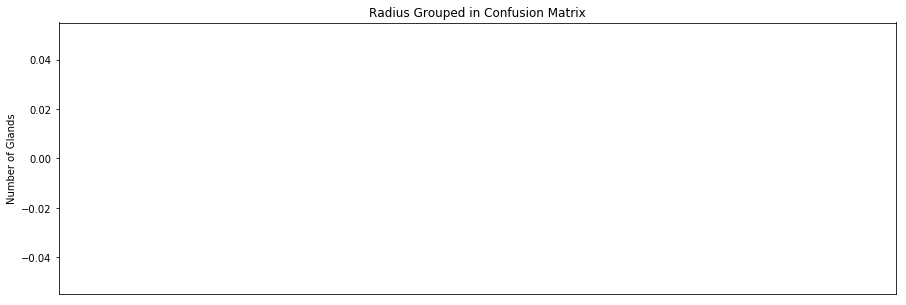

In [12]:
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))

rects3 = ax.bar(x - (1.5*width), true_negative, width, label='True Negative', color='green')
rects1 = ax.bar(x - width/2, true_positive, width, label='True Positive', color='red')

rects2 = ax.bar(x + width/2, false_positive, width, label='False Positive', color='blue')
rects4 = ax.bar(x + (1.5*width), false_negative, width, label='False Negative', color='yellow')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Glands')
ax.set_title('Radius Grouped in Confusion Matrix')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

In [13]:
from sklearn import preprocessing

np.set_printoptions(precision=2)

n_true_negative = preprocessing.minmax_scale(true_negative, feature_range=(0,1), axis=0, copy=True)
n_true_positive = preprocessing.minmax_scale(true_positive, feature_range=(0,1), axis=0, copy=True)
n_false_positive = preprocessing.minmax_scale(false_positive, feature_range=(0,1), axis=0, copy=True)
n_false_negative = preprocessing.minmax_scale(false_negative, feature_range=(0,1), axis=0, copy=True)


n_true_negative  = np.array(['{:3.2f}'.format(x) for x in n_true_negative], dtype=float)
n_true_positive  = np.array(['{:3.2f}'.format(x) for x in n_true_positive], dtype=float)
n_false_positive = np.array(['{:3.2f}'.format(x) for x in n_false_positive], dtype=float)
n_false_negative = np.array(['{:3.2f}'.format(x) for x in n_false_negative], dtype=float)

print(n_true_negative)
print(n_true_positive)
print(n_false_positive)
print(n_false_negative)

fig, ax = plt.subplots(figsize=(15,5))

rects3 = ax.bar(x - (1.5*width), n_true_negative, width, label='True Negative', color='green')
rects1 = ax.bar(x - width/2, n_true_positive, width, label='True Positive', color='red')

rects2 = ax.bar(x + width/2, n_false_positive, width, label='False Positive', color='blue')
rects4 = ax.bar(x + (1.5*width), n_false_negative, width, label='False Negative', color='yellow')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Glands')
ax.set_title('Radius Grouped in Confusion Matrix')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [17]:
x = np.arange(len([labels[0]]))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,5))

rects3 = ax.bar(x - (2.5*width), true_negative[0], width, label='True Negative', color='green')
rects1 = ax.bar(x - width/1.5, true_positive[0], width, label='True Positive', color='red')

rects2 = ax.bar(x + width/1.5, false_positive[0], width, label='False Positive', color='blue')
rects4 = ax.bar(x + (2.5*width), false_negative[0], width, label='False Negative', color='yellow')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Glands')
ax.set_title('Radius Grouped in Confusion Matrix')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()


plt.show()

IndexError: list index out of range